In [5]:
#유방암 데이터 분석
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv('data.csv')

print(df.shape)
print(df.info)
print(df['diagnosis'].value_counts()) #카테고리형 데이터가 각각 몇 번 나오는지 세는 함수

df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

print(df.describe())

(569, 33)
<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92 

In [6]:
#문자열 숫자로 변환
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

print(df['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

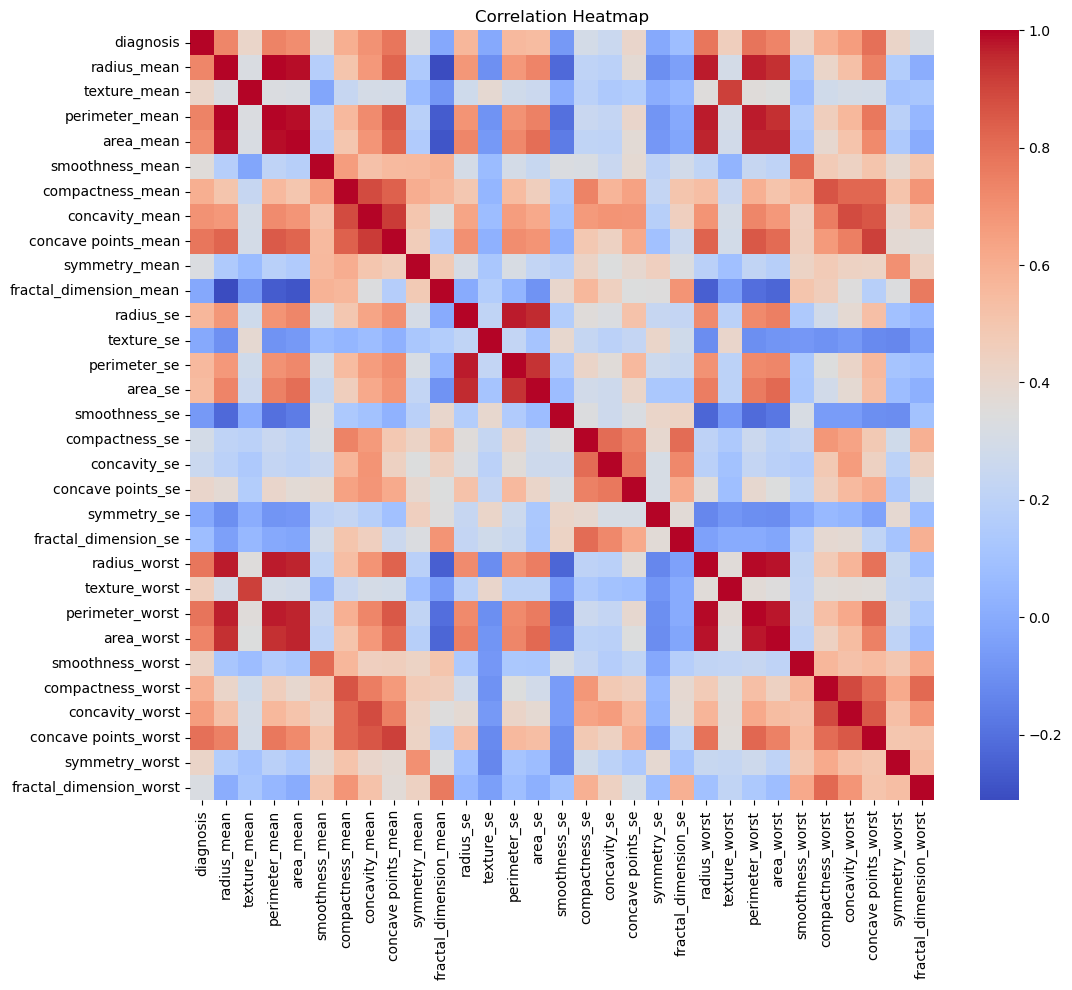

In [7]:
#시각화
corr_matrix = df.corr()

print(corr_matrix['diagnosis'].sort_values(ascending=False))

import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

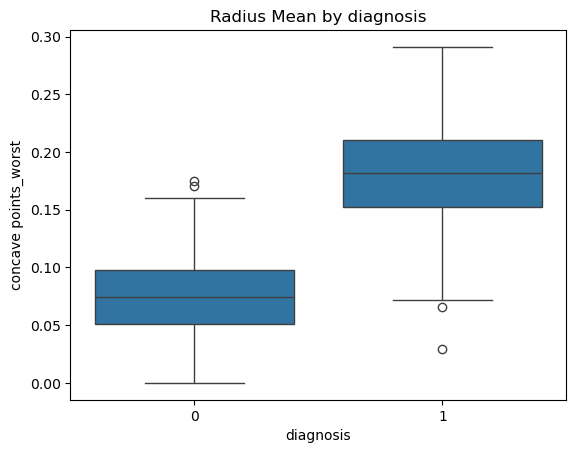

In [8]:
#주요 feature boxplot으로 비교

sns.boxplot(x='diagnosis', y='concave points_worst', data=df)
plt.title('Radius Mean by diagnosis')
plt.show()

In [ ]:
#데이터 분리
y = df['diagnosis'] #label

X = df.drop(['diagnosis'], axis=1) #feature


In [10]:
#학습/테스트 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (455, 30)
Test shape: (114, 30)


In [ ]:
#정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [12]:
#모델학습
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [18]:
#성능 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 예측 대상: 테스트 데이터
y_pred = model.predict(X_test_scaled)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9824561403508771

Confusion Matrix:
 [[71  0]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



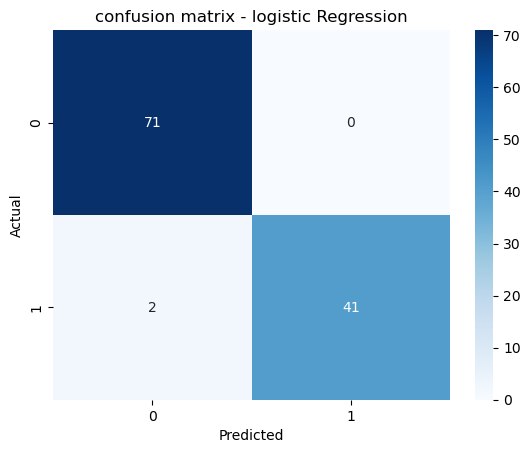

In [19]:
#confusion matrix 시각화
import seaborn as sns
import matplotlib.pyplot as plt 
 
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix - logistic Regression')
plt.show()

In [20]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9649122807017544

Confusion Matrix:
 [[70  1]
 [ 3 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

